## 使用 Swin2SR 算法缩放图片

Link：https://huggingface.co/docs/transformers/main/en/model_doc/swin2sr#transformers.Swin2SRForImageSuperResolution.forward.example

In [1]:
!pip install transformers
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.6/769.6 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.3 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 70.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 26.4 MB/s eta 0:

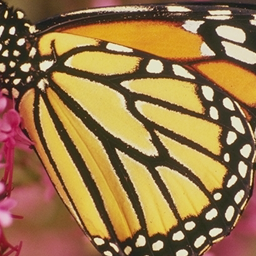

In [3]:
import torch
import numpy as np
from PIL import Image
import requests

from transformers import AutoImageProcessor, Swin2SRForImageSuperResolution

processor = AutoImageProcessor.from_pretrained("caidas/swin2SR-classical-sr-x2-64")
model = Swin2SRForImageSuperResolution.from_pretrained("caidas/swin2SR-classical-sr-x2-64")

url = "https://huggingface.co/spaces/jjourney1125/swin2sr/resolve/main/samples/butterfly.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

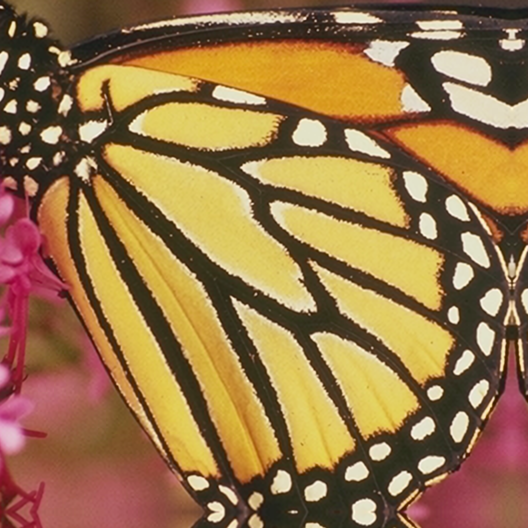

In [5]:
# prepare image for the model
inputs = processor(image, return_tensors="pt")

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

output = outputs.reconstruction.data.squeeze().float().cpu().clamp_(0, 1).numpy()
output = np.moveaxis(output, source=0, destination=-1)
output = (output * 255.0).round().astype(np.uint8)  # float32 to uint8
# you can visualize `output` with `Image.fromarray`
img = Image.fromarray(output)
img